In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print ('model loaded sucessfully')

model loaded sucessfully


In [49]:
path = './test/1.jpeg'
image = load_img(path)
image = np.array(image, dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0

In [24]:
h,w,d = image.shape
print('Height of the image =', h)
print('width of the image =', w)

Height of the image = 510
width of the image = 827


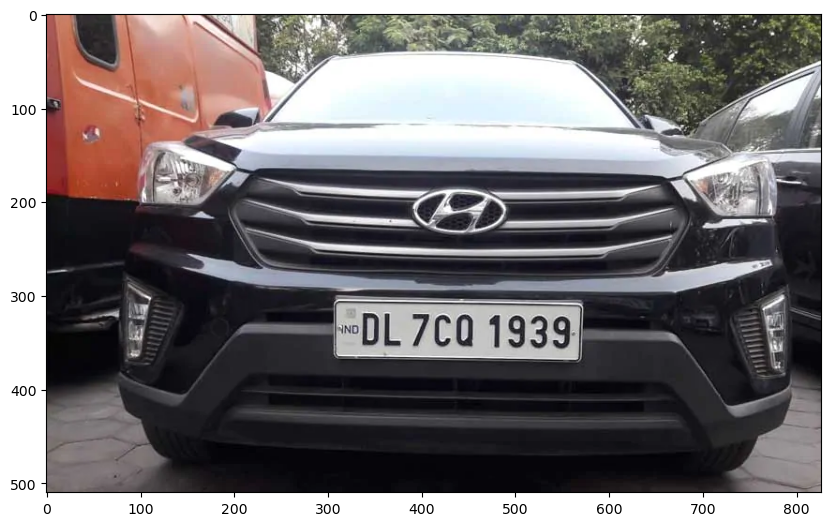

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [26]:
image_arr_224.shape

(224, 224, 3)

In [27]:
test_arr = image_arr_224.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [28]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 170ms/step


array([[0.5019382, 0.7403598, 0.4575489, 0.651391 ]], dtype=float32)

In [29]:
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[415.10291111, 612.27754068, 233.34993213, 332.20942497]])

In [30]:
coords = coords.astype(np.int32)
coords


array([[415, 612, 233, 332]], dtype=int32)

(415, 233) (612, 332)


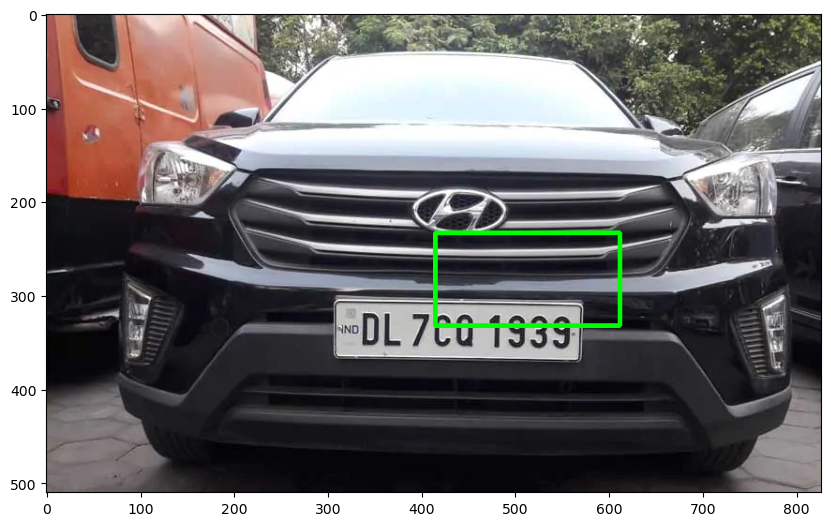

In [31]:
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print (pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [32]:
def object_detection(path, model):
    image1 = load_img(path, target_size=(224, 224))
    image_arr_224 = img_to_array(image1) / 255.0
    h, w, d = image_arr_224.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)

    coords = model.predict(test_arr)

    denorm = np.array([w, w, h, h])
    coords = coords * denorm

    coords = coords.astype(np.int32)

    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    
       # Create a copy of the image to draw rectangles on
    image_with_boxes = np.array(image1)

    # Draw the rectangle on the image
    cv2.rectangle(image_with_boxes, pt1, pt2, (0, 255, 0), 3)
    
    return image_with_boxes, coords

1/1 [==============================] - 0s 179ms/step
(72, 103) (156, 161)


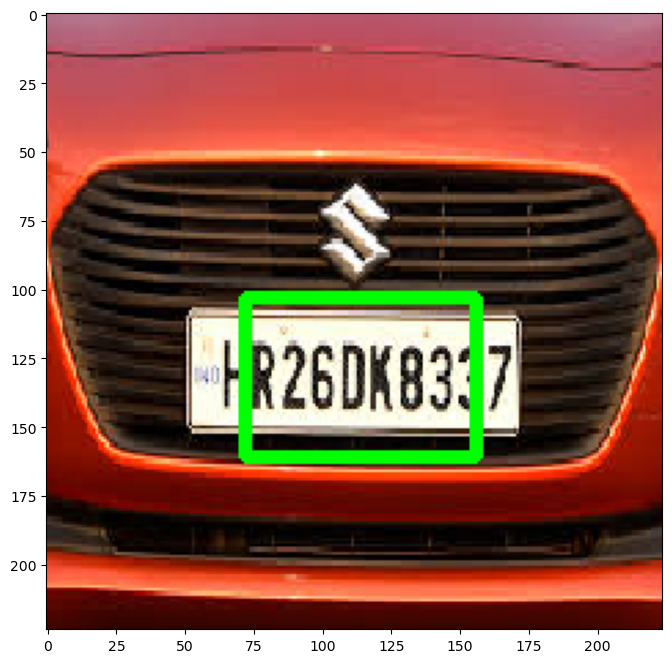

In [50]:
path = './test/1.jpeg'  # Update the path to your image
image, cods = object_detection(path, model)  # Provide the object detection model

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.show()

In [60]:
cods


array([[ 72, 156, 103, 161]], dtype=int32)

In [51]:
import pytesseract as pt
from PIL import Image

1/1 [==============================] - 0s 185ms/step
(72, 103) (156, 161)


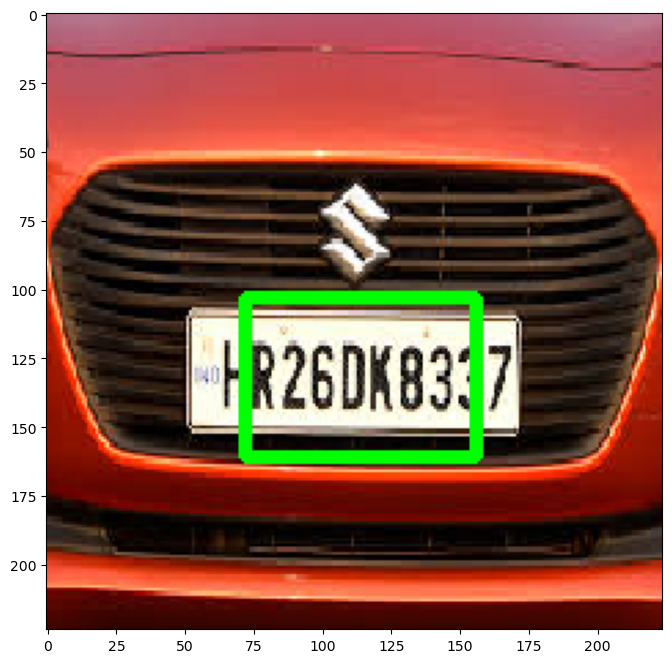

In [53]:
path = './test/1.jpeg'  # Update the path to your image
image, cods = object_detection(path, model)  # Provide the object detection model

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.show()

In [58]:
cods

array([[ 72, 156, 103, 161]], dtype=int32)

In [57]:
img = np.array (load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

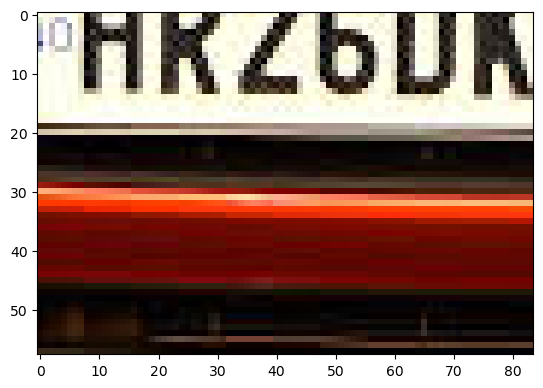

In [55]:
plt.imshow(roi)
plt.show()

In [59]:
cods


array([[ 72, 156, 103, 161]], dtype=int32)

In [56]:
text = pt.image_to_string(roi)
print(text)